In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Let's print the basic info of the data to get an overview and to familiarise ourselves with what's in the data

In [30]:
df = pd.read_csv("AviationData.csv", encoding = 'ISO-8859-1')
df

C:\Users\Mannu\AppData\Local\Temp\ipykernel_13664\285829152.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData.csv", encoding = 'ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

##### From the overview of the data we have  88889 rows and 31 columnns

In [32]:
#List of columns in the data
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

# Data Cleaning

In [33]:
#Check for missing values in each colums
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [34]:
# drop columns with alot of missing data say those with more than 20000 missing values
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Air.carrier', 'Broad.phase.of.flight', 'Schedule']
df = df.drop(columns= columns_to_drop)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Injury.Severity,Aircraft.damage,Registration.Number,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,NC6404,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,N5069P,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,N5142R,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,N1168J,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,N15NY,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,Minor,NaN,N1867H,...,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,Non-Fatal,Substantial,N749PJ,...,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,...,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


#### We now the original number of rows 88889 but columns have dropped to 23

In [35]:
#List remaining columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Injury.Severity',
       'Aircraft.damage', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')

In [36]:
# For the purpose for our analysis some columns are not really imoportant, we can still drop more
more_columns_to_drop =['Registration.Number', 'Amateur.Built', 'Engine.Type', 'Report.Status', 'Publication.Date']
df = df.drop(columns=more_columns_to_drop)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,Cessna,172M,1.0,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,Minor,NaN,PIPER,PA-28-151,NaN,Personal,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,Personal,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,CESSNA,210N,NaN,Personal,0.0,0.0,0.0,0.0,NaN


#### We now have 88889 rows and 18 columns remaining

In [37]:
#Using loop lets remove rows that have value '0' in columns 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'
# remove rows which have value 'Non-Fatal' in column 'Injury.Severity' and have some number of fatal injuries
# remove rows which have value 'Fatal' in column 'Injury.Severity' and don’t have some number of fatal Injuries
drop_list = list()
for index, row in df[['Injury.Severity','Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].iterrows():
    if row[1] == 0 and row[2] == 0 and row[3] == 0 and row[4] == 0:
        drop_list.append(index)
    if row[0] == 'Non-Fatal' and row[1] > 0 and row[4] >=1:
        drop_list.append(index)
    if row[0] == 'Fatal' and row[1] <= 0 and row[4]>0:
        drop_list.append(index)
df = df.drop(index=drop_list).reset_index(drop=True)
df

C:\Users\Mannu\AppData\Local\Temp\ipykernel_13664\2146335139.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[1] == 0 and row[2] == 0 and row[3] == 0 and row[4] == 0:
C:\Users\Mannu\AppData\Local\Temp\ipykernel_13664\2146335139.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] == 'Non-Fatal' and row[1] > 0 and row[4] >=1:
C:\Users\Mannu\AppData\Local\Temp\ipykernel_13664\2146335139.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,Cessna,172M,1.0,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87779,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,Minor,NaN,GRUMMAN AMERICAN AVN. CORP.,AA-5B,NaN,Instructional,0.0,1.0,0.0,1.0,NaN
87780,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,Fatal,NaN,AIR TRACTOR,AT502,NaN,NaN,1.0,0.0,0.0,0.0,NaN
87781,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,Minor,NaN,PIPER,PA-28-151,NaN,Personal,0.0,1.0,0.0,0.0,NaN
87782,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,Personal,0.0,0.0,0.0,1.0,VMC


#### We now have 87784 rows and 19 columns

In [38]:
# Quick look at the data we now have
df.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
87779  20221222106486           Accident      CEN23LA068  2022-12-21   
87780  20221228106502           Accident      GAA23WA046  2022-12-22   
87781  20221227106491           Accident      ERA23LA093  2022-12-26   
87782  20221227106497           Accident      WPR23LA075  2022-12-26   
87783  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country Airport.Code Injury.Severity  \
0      MOOSE CREEK, ID  United St

# Visualization and Data Analysis

In [39]:
# Convert date column to datetime format
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,Fatal(2),Destroyed,Stinson,108-3,1.0,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,Fatal(4),Destroyed,Piper,PA24-180,1.0,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,Fatal(3),Destroyed,Cessna,172M,1.0,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,Fatal(2),Destroyed,Rockwell,112,1.0,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,Fatal(1),Destroyed,Cessna,501,NaN,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87779,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,Minor,NaN,GRUMMAN AMERICAN AVN. CORP.,AA-5B,NaN,Instructional,0.0,1.0,0.0,1.0,NaN
87780,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,Fatal,NaN,AIR TRACTOR,AT502,NaN,NaN,1.0,0.0,0.0,0.0,NaN
87781,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,Minor,NaN,PIPER,PA-28-151,NaN,Personal,0.0,1.0,0.0,0.0,NaN
87782,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,PAN,Non-Fatal,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,Personal,0.0,0.0,0.0,1.0,VMC


In [40]:
# Extract year for trend analysis
df["Year"] = df["Event.Date"].dt.year

In [41]:
# Total Accidents
total_accidents = df.shape[0]
total_accidents


87784

In [42]:
#Accident Distribution by Year
accidents_per_year = df["Year"].value_counts().sort_index()
accidents_per_year

Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3095
1986    2879
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2256
1995    2309
1996    2186
1997    2145
1998    2212
1999    2209
2000    2218
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1857
2009    1749
2010    1726
2011    1803
2012    1783
2013    1505
2014    1487
2015    1523
2016    1565
2017    1555
2018    1592
2019    1521
2020    1319
2021    1431
2022    1478
Name: count, dtype: int64

#### The data above shows the subsequent number od accidents in each year

In [43]:
# using If statement lets finf the Most Common Aircraft Models
if "Make" in df.columns and "Model" in df.columns:
    df["Aircraft_Model"] = df["Make"].astype(str) + " " + df["Model"].astype(str)
    common_models = df["Aircraft_Model"].value_counts().head(10)
else:
    common_models = "Aircraft model data not available."
common_models

Aircraft_Model
Cessna 152         2168
Cessna 172         1253
Cessna 172N         996
Piper PA-28-140     812
Cessna 150          715
Cessna 172M         667
Cessna 172P         597
Cessna 150M         539
Piper PA-18         539
Piper PA-28-161     502
Name: count, dtype: int64

In [44]:
#Fatality Rates by Aircraft Make
if "Make" in df.columns and "Total.Fatal.Injuries" in df.columns:
    df["Total.Fatal.Injuries"] = pd.to_numeric(df["Total.Fatal.Injuries"], errors="coerce")
    fatality_rates_Make = df.groupby("Make")["Total.Fatal.Injuries"].sum().sort_values(ascending=False).dropna()
else:
    fatality_rates_Make = "Fatality rate data not available."
fatality_rates_Make

Make
Cessna                   7688.0
Boeing                   6532.0
Piper                    5413.0
Beech                    2945.0
BOEING                   2216.0
                          ...  
HONDA AIRCRAFT CO LLC       0.0
HONDA AIRCRAFT              0.0
HOMER                       0.0
HOLT HERBERT L              0.0
unknown                     0.0
Name: Total.Fatal.Injuries, Length: 8203, dtype: float64

#### From the analysis above we find that aircafts of make Cessna, Boeing, Piper, Beech, BOEING have a higher fatality rate compared to others makes

In [45]:
#Fatality Rates by Aircraft Model
if "Model" in df.columns and "Total.Fatal.Injuries" in df.columns:
    df["Total.Fatal.Injuries"] = pd.to_numeric(df["Total.Fatal.Injuries"], errors="coerce")
    fatality_rates_Model = df.groupby("Model")["Total.Fatal.Injuries"].sum().sort_values(ascending=False).dropna()
else:
    fatality_rates_Model = "Fatality rate data not available."
fatality_rates_Model

Model
737          1348.0
737-200       906.0
777 - 206     534.0
A320          513.0
MD-82         439.0
              ...  
L-4H            0.0
Auriga          0.0
L-4             0.0
L-3C            0.0
&GCBC           0.0
Name: Total.Fatal.Injuries, Length: 12177, dtype: float64

#### From the fatality analysis based on the model we find that aircrafts of mode; 737, 737-200, 777 - 206, A320, MD-82 have a higher fatality rate compared to others

In [46]:
#Using if else statement lets check the effects of Weather Conditions in Accidents
if "Weather.Condition" in df.columns:
    weather_accidents = df["Weather.Condition"].value_counts()
else:
    weather_accidents = "Weather condition data not available."
weather_accidents

Weather.Condition
VMC    77213
IMC     5968
UNK      836
Unk      236
Name: count, dtype: int64

#### From the analysis above under weather condition VMC a number of accidents were reporetd and therefore its more important to avoid such conditions

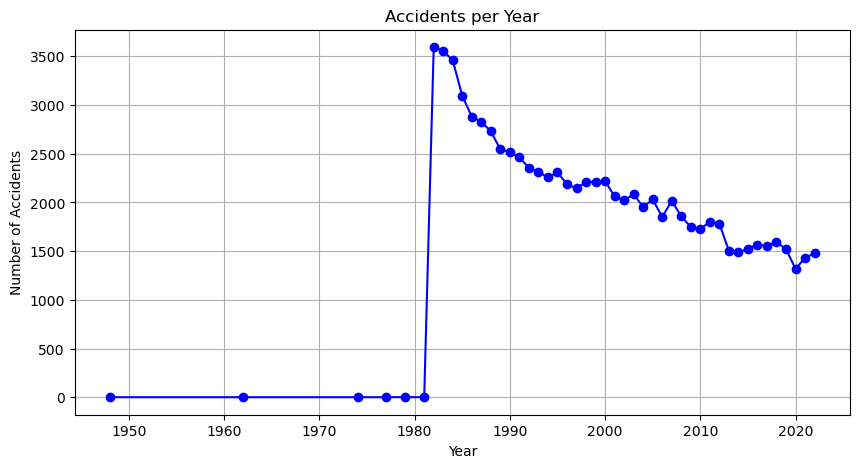

In [51]:
#Plot of accident trends over time
plt.figure(figsize=(10, 5))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker="o", linestyle="-", color="b")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents per Year")
plt.grid(True)
plt.show()

#### from the chart above we can conclude that from the year 1980 there's been a year in out drop in the number of accidents. This might be due to improve technology being applied in making the aircrafts.

In [56]:
# Print Results
print(f"Total Accidents: {total_accidents}")
print(f"Least Common Aircraft Models in Accidents:\n{common_models.tail()}")
print(f"Fatality Rates by Aircraft Type:\n{fatality_rates.tail(10)}")
print(f"Accidents by Weather Condition:\n{weather_accidents.tail()}")

Total Accidents: 87784
Least Common Aircraft Models in Accidents:
Aircraft_Model
Cessna 172M        667
Cessna 172P        597
Cessna 150M        539
Piper PA-18        539
Piper PA-28-161    502
Name: count, dtype: int64
Fatality Rates by Aircraft Type:
Make
HOSKINS LONNIE F         0.0
HOSKINS                  0.0
HOOVER FRANK             0.0
HOOVER DAVID             0.0
HOOD JOHN SIDNEY         0.0
HONDA AIRCRAFT CO LLC    0.0
HONDA AIRCRAFT           0.0
HOMER                    0.0
HOLT HERBERT L           0.0
unknown                  0.0
Name: Total.Fatal.Injuries, dtype: float64
Accidents by Weather Condition:
Weather.Condition
VMC    77213
IMC     5968
UNK      836
Unk      236
Name: count, dtype: int64


#### The data analyzed above gives us the clear look of what we have to make our conclusion based on.
1. The best Aircraft model that are least prone to accidents are 
Aircraft_Model
Cessna 172M        667
Cessna 172P        597
Cessna 150M        539
Piper PA-18        539
Piper PA-28-161    502
2. Tha Aircrafts makes that are least prone to accidents are
HOSKINS LONNIE F         0.0
HOSKINS                  0.0
HOOVER FRANK             0.0
HOOVER DAVID             0.0
HOOD JOHN SIDNEY         0.0
HONDA AIRCRAFT CO LLC    0.0
HONDA AIRCRAFT           0.0
HOMER                    0.0
HOLT HERBERT L           0.0
unknown                  0.0
3. The best weather condition to board and Aircraft and minimise the risk of getting involved in an accident are
Weather.Condition
VMC    77213
IMC     5968
UNK      836
Unk      236